Быстрый старт в анализ данных
с помощью Pandas и Scikit-learn, а также numpy и matplotlib

numpy – матричные операции
matplotlib – научная графика
pandas – таблицы (DataFrame) для анализа данных
scikit-learn – алгоритмы машинного обучения

In [1]:
import numpy as np             
import matplotlib.pyplot as plt 
import matplotlib
import pandas as pd            
import seaborn as sns           
import sklearn 

### 0.Описание задачи

Этот набор данных содержит зарплаты 5,5 тыс. футболистов включая следующие столбцы:
- позиция
- игрок
- команда
- возраст
- общая стоимость
- avg_year  (средняя строимость за год)
- total_guaranteed  (гарантированная зарплата по контракту в команде)
- fully_guaranteed  (нижний предел зарплаты(индивидуальный нижний предел на рынке) независимо от команды)
- free_agency (срок окончания контракта и его тип)

Необходимо определить на какой позиции будет стоять игрок (задача классификации)  
Считываем данные и печатаем их для удобства

### 1.Чтение данных из файла

In [2]:
data_train = pd.read_csv('./football_salaries.csv', sep = ',', engine = 'python')
data_train.head()

,position,player,team,age,total_value,avg_year,total_guaranteed,fully_guaranteed,free_agency
0,right-tackle,Trent Brown,Raiders,26,66000000,16500000,36250000,36250000,2023 UFA
1,right-tackle,Ja’Wuan James,Broncos,27,51000000,12750000,32000000,27000000,2023 UFA
2,right-tackle,Lane Johnson,Eagles,29,56250000,11250000,35500000,20862242,2022 Void
3,right-tackle,Ricky Wagner,Lions,30,47500000,9500000,29500000,17500000,2022 UFA
4,right-tackle,Rob Havenstein,Rams,26,32500000,8125000,16226365,9976365,2023 UFA


In [3]:
data_train.tail()

,position,player,team,age,total_value,avg_year,total_guaranteed,fully_guaranteed,free_agency
5518,defensive-back,Trey Johnson,Broncos,25,495000,495000,0,0,2020 ERFA
5519,defensive-back,Rolan Milligan,Colts,25,975000,487500,0,0,2020 ERFA
5520,defensive-back,Jeremy Reaves,Redskins,23,975000,487500,0,0,2020 ERFA
5521,defensive-back,Dallin Leavitt,Raiders,25,975000,487500,0,0,2020 ERFA
5522,defensive-back,Jake Carlock,Giants,23,1762500,20000,0,20000,2022 RFA


### 2. Визуализация данных и вычисление основных характеристик

Рассплитим последним столбец, который содержит в себе сразу двойную информацию: год окончания контракта и тип контракта. Получим категориальный признак type_contract.

In [4]:
data_train[['year_grad','type_contract']] = data_train['free_agency'].str.split( expand=True)
data_train = data_train.drop(['free_agency'], axis=1)
data_train.head()

,position,player,team,age,total_value,avg_year,total_guaranteed,fully_guaranteed,year_grad,type_contract
0,right-tackle,Trent Brown,Raiders,26,66000000,16500000,36250000,36250000,2023,UFA
1,right-tackle,Ja’Wuan James,Broncos,27,51000000,12750000,32000000,27000000,2023,UFA
2,right-tackle,Lane Johnson,Eagles,29,56250000,11250000,35500000,20862242,2022,Void
3,right-tackle,Ricky Wagner,Lions,30,47500000,9500000,29500000,17500000,2022,UFA
4,right-tackle,Rob Havenstein,Rams,26,32500000,8125000,16226365,9976365,2023,UFA


In [5]:
data_train.tail()

,position,player,team,age,total_value,avg_year,total_guaranteed,fully_guaranteed,year_grad,type_contract
5518,defensive-back,Trey Johnson,Broncos,25,495000,495000,0,0,2020,ERFA
5519,defensive-back,Rolan Milligan,Colts,25,975000,487500,0,0,2020,ERFA
5520,defensive-back,Jeremy Reaves,Redskins,23,975000,487500,0,0,2020,ERFA
5521,defensive-back,Dallin Leavitt,Raiders,25,975000,487500,0,0,2020,ERFA
5522,defensive-back,Jake Carlock,Giants,23,1762500,20000,0,20000,2022,RFA


Отобразим основные характеристики каждого из параметров для ненормированных данных и 
матрицу ковариаций


In [6]:
data_train.describe()

,age,total_value,avg_year,total_guaranteed,fully_guaranteed
count,5523.000000,5.523000e+03,5.523000e+03,5.523000e+03,5.523000e+03
mean,187.901141,7.786235e+06,2.250830e+06,3.803250e+06,3.095552e+06
std,549.109622,1.590476e+07,3.573839e+06,9.728381e+06,7.322756e+06
min,0.000000,1.050000e+05,0.000000e+00,0.000000e+00,0.000000e+00
25%,24.000000,1.350000e+06,5.853330e+05,0.000000e+00,0.000000e+00
50%,25.000000,2.075000e+06,6.900000e+05,9.000000e+04,8.705600e+04
75%,28.000000,4.673694e+06,2.000000e+06,1.600000e+06,1.500000e+06
max,2020.000000,1.500000e+08,3.500000e+07,1.070000e+08,9.450000e+07


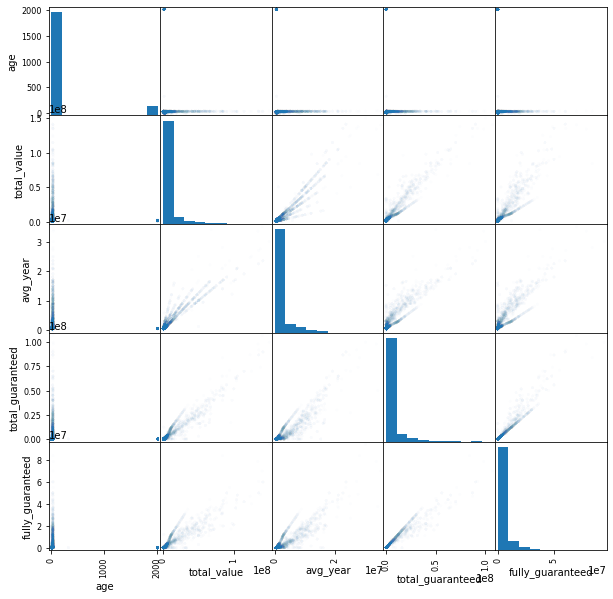

In [7]:
from pandas.plotting import scatter_matrix
scatter_matrix(data_train, alpha = .01, figsize = (10, 10))
pass

In [8]:
data_train['age'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005       0.0
0.010       0.0
0.050       0.0
0.100      21.0
0.500      25.0
0.900      33.0
0.950    2020.0
0.990    2020.0
0.995    2020.0
Name: age, dtype: float64

Нетрудно заметить, что в пункте age в каких-то из строк находится ошибка, так как у игрока не может быть возраст 2020, ровно также как и не может быть возраст 0. Очевидно, что просто взять и удалить эти строки нельзя, так как мы лишимся почти 20% данных (это можно наблюдать при деления всего распределения возрастов на квантили). Для борьбы с такими выбросами заменим все числа больше 48 и меньше 16 ( самый старый и молодой игрок в американский футбол за всю историю) в столбце age на NaN, и в следующем пункте обработаем эти данные, заменив на медианный возраст. 

In [9]:
data_train.loc[data_train[
    (data_train['age'] > 48) | (data_train['age'] < 16)].index, "age"] = np.nan

In [10]:
data_train['age'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005    22.0
0.010    22.0
0.050    23.0
0.100    23.0
0.500    25.0
0.900    30.0
0.950    31.0
0.990    35.0
0.995    37.0
Name: age, dtype: float64

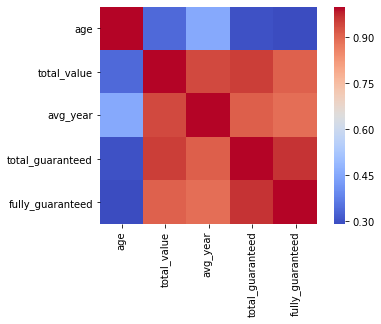

In [11]:
corr_mat = data_train.corr()
sns.heatmap(corr_mat, square=True, cmap='coolwarm')
pass

In [12]:
corr_mat.where(np.triu(corr_mat > 0.0, k=1)).stack().sort_values(ascending=False)

total_guaranteed  fully_guaranteed    0.964839
total_value       total_guaranteed    0.955221
                  avg_year            0.939605
avg_year          total_guaranteed    0.911433
total_value       fully_guaranteed    0.911147
avg_year          fully_guaranteed    0.891121
age               avg_year            0.453844
                  total_value         0.339023
                  total_guaranteed    0.300218
                  fully_guaranteed    0.290094
dtype: float64

На данной диаграмме видно, что признаки, связанные с ценами, сильно коррелируют. К примеру, если мы возьмем total_value(стоимость контракта игрока) и total_guaranteed (гарантированная зарплата игрока в команде) то увидим, что коэффициент корреляции порядка 0,9 и это полностью соответсвует реальности: Гарантированная зарплата, зачастую высчитывается как 50-70% от стоимости контракта - это та сумма которую получит игрок, даже если не выйдет на поле ни в одной из игр (из-за травм или еще каких-то объективных причин).

### 3.Обработка пропущенных значений

In [13]:
data_train.isna().sum()
#data_train['free_agency'].value_counts()

position               0
player                 0
team                   0
age                 1009
total_value            0
avg_year               0
total_guaranteed       0
fully_guaranteed       0
year_grad              5
type_contract          5
dtype: int64

Заполним медианами пропущенные значения в столбцах, соответствующих числовым признакам.
Пропущенные значения в столбцах, соответствующих категориальным признакам, заполним модой.

In [14]:
data_train['age'].fillna(data_train['age'].median(axis = 0), axis=0 , inplace=True)
data_train['year_grad'].fillna(data_train['year_grad'].median(axis = 0), axis=0 , inplace=True)
data_train['type_contract'].fillna(data_train['type_contract'].mode().iloc[0], inplace=True)
data_train.isna().sum()

position            0
player              0
team                0
age                 0
total_value         0
avg_year            0
total_guaranteed    0
fully_guaranteed    0
year_grad           0
type_contract       0
dtype: int64

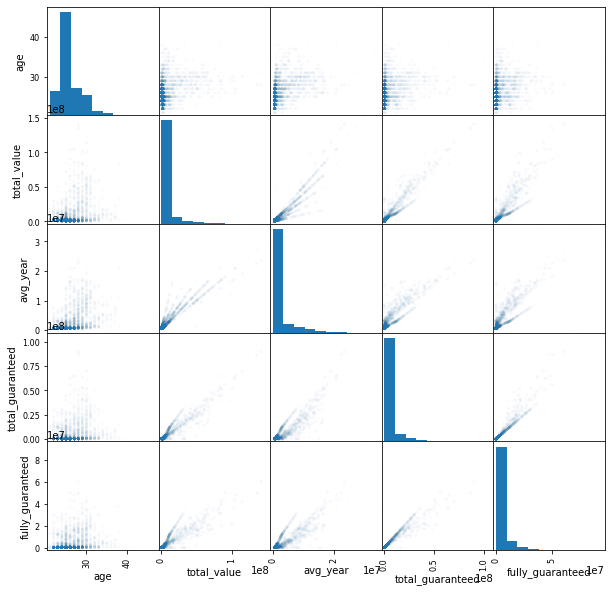

In [15]:
from pandas.plotting import scatter_matrix
scatter_matrix(data_train, alpha = .01, figsize = (10, 10))
pass

### Борьба с несбалансированностью классов.

В представленной выборке есть классы представленные малым количеством элементов. Это можно увидеть в таблице ниже.

In [16]:
data_train['position'].value_counts()

defensive-back             549
offensive-line             489
defensive-line             426
wide-receiver              383
linebacker                 369
cornerback                 315
traditional-linebacker     300
interior-defensive-line    271
safety                     233
edge-rusher                218
running-back               197
tight-end                  195
inside-linebacker          171
4-3-defensive-end          153
4-3-defensive-tackle       142
4-3-outside-linebacker     129
quarterback                119
left-tackle                111
right-guard                108
right-tackle               100
left-guard                  97
3-4-defensive-end           96
center                      90
3-4-outside-linebacker      67
punter                      46
kicker                      44
long-snapper                43
3-4-defensive-tackle        40
fullback                    22
Name: position, dtype: int64

Так как у нас данные несбалансированные, то сделаем так, чтобы игроков каждой позиции было одинаковое количество, а именно 549 - самая популярная позиция игрока. Для этого применим оверсэмплинг

In [17]:
position_col = data_train['position']
num_0 = position_col.value_counts()['defensive-back']
print(num_0)
data_train = pd.concat([ data_train[data_train['position']=='defensive-back'],
                                data_train[data_train['position']=='offensive-line'].sample(num_0, replace=True),
                                data_train[data_train['position']=='defensive-line'].sample(num_0, replace=True),
                                data_train[data_train['position']=='wide-receiver'].sample(num_0, replace=True),
                                data_train[data_train['position']=='linebacker'].sample(num_0, replace=True),
                                data_train[data_train['position']=='cornerback'].sample(num_0, replace=True),
                                data_train[data_train['position']=='traditional-linebacker'].sample(num_0, replace=True),
                                data_train[data_train['position']=='interior-defensive-line'].sample(num_0, replace=True),
                                data_train[data_train['position']=='safety'].sample(num_0, replace=True),
                                data_train[data_train['position']=='edge-rusher'].sample(num_0, replace=True),
                                data_train[data_train['position']=='running-back'].sample(num_0, replace=True),
                                data_train[data_train['position']=='tight-end'].sample(num_0, replace=True),
                                data_train[data_train['position']=='inside-linebacker'].sample(num_0, replace=True),
                                data_train[data_train['position']=='4-3-defensive-end'].sample(num_0, replace=True),
                                data_train[data_train['position']=='4-3-defensive-tackle'].sample(num_0, replace=True),
                                data_train[data_train['position']=='4-3-outside-linebacker'].sample(num_0, replace=True),
                                data_train[data_train['position']=='quarterback'].sample(num_0, replace=True),
                                data_train[data_train['position']=='left-tackle'].sample(num_0, replace=True),
                                data_train[data_train['position']=='right-guard'].sample(num_0, replace=True),
                                data_train[data_train['position']=='right-tackle'].sample(num_0, replace=True),
                                data_train[data_train['position']=='left-guard'].sample(num_0, replace=True),
                                data_train[data_train['position']=='3-4-defensive-end'].sample(num_0, replace=True),
                                data_train[data_train['position']=='center'].sample(num_0, replace=True),
                                data_train[data_train['position']=='3-4-outside-linebacker'].sample(num_0, replace=True),
                                data_train[data_train['position']=='punter'].sample(num_0, replace=True),
                                data_train[data_train['position']=='kicker'].sample(num_0, replace=True),
                                data_train[data_train['position']=='long-snapper'].sample(num_0, replace=True),
                                data_train[data_train['position']=='3-4-defensive-tackle'].sample(num_0, replace=True),
                                data_train[data_train['position']=='fullback'].sample(num_0, replace=True)])
# dt = data_train.tail(549)
print(data_train['position'].value_counts())

549
cornerback                 549
3-4-defensive-tackle       549
defensive-back             549
4-3-defensive-end          549
linebacker                 549
long-snapper               549
right-tackle               549
left-tackle                549
wide-receiver              549
kicker                     549
inside-linebacker          549
edge-rusher                549
center                     549
safety                     549
4-3-defensive-tackle       549
quarterback                549
tight-end                  549
running-back               549
4-3-outside-linebacker     549
left-guard                 549
offensive-line             549
punter                     549
traditional-linebacker     549
interior-defensive-line    549
fullback                   549
defensive-line             549
3-4-defensive-end          549
3-4-outside-linebacker     549
right-guard                549
Name: position, dtype: int64


### 4.Обработка категориальных признаков

Далее для работы нужно бинаризировать номинальные признаки. Для этого сначала 
посмотрим какие значения могут принимать категориальные признаки:

In [18]:
data_train['type_contract'].unique()

array(['UFA', 'Void', 'ERFA', 'RFA'], dtype=object)

In [19]:
data_train['team'].unique()

array(['Dolphins', 'Redskins', 'Jets', 'Vikings', 'Cardinals', 'Chiefs',
       'Bears', 'Ravens', 'Falcons', 'Jaguars', 'Patriots', 'Giants',
       'Titans', 'Broncos', 'Lions', 'Chargers', 'Bengals', 'Raiders',
       'Texans', 'Rams', '49ers', 'Steelers', 'Packers', 'Eagles',
       'Browns', 'Colts', 'Panthers', 'Bills', 'Saints', 'Seahawks',
       'Buccaneers', 'Cowboys'], dtype=object)

Теперь бинаризуем их:

In [20]:
agency_dummies = pd.get_dummies(data_train['type_contract'])
agency_dummies.head()

,ERFA,RFA,UFA,Void
893,0,0,1,0
1014,0,0,1,0
1015,0,0,1,0
1016,0,0,1,0
1017,0,0,1,0


In [21]:
team_dummies = pd.get_dummies(data_train['team'])
team_dummies.head()

,49ers,Bears,Bengals,Bills,Broncos,Browns,Buccaneers,Cardinals,Chargers,Chiefs,...,Raiders,Rams,Ravens,Redskins,Saints,Seahawks,Steelers,Texans,Titans,Vikings
893,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1014,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1016,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1017,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


Добавим эти dummy-столбцы к таблице и удалим категориальные столбцы:

In [22]:
data_train = pd.concat((data_train,team_dummies), axis=1)
data_train = pd.concat((data_train,agency_dummies), axis=1)

In [23]:
position_col = data_train['position']
data_train = data_train.drop(['team'], axis=1)
data_train = data_train.drop(['position'], axis=1)
data_train = data_train.drop(['player'], axis=1)
data_train = data_train.drop(['type_contract'], axis=1)
data_train = data_train.drop(['year_grad'], axis=1)
# data_train = data_train.drop(['age'], axis=1)
data_train.head()

,age,total_value,avg_year,total_guaranteed,fully_guaranteed,49ers,Bears,Bengals,Bills,Broncos,...,Saints,Seahawks,Steelers,Texans,Titans,Vikings,ERFA,RFA,UFA,Void
893,26.0,75250000,15050000,46000000,27185641,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1014,32.0,75000000,15000000,50000000,36500000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1015,29.0,72500000,14500000,45000000,34000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1016,29.0,70100000,14020000,40826000,20026000,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1017,29.0,70050000,14010000,48000000,16250000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [24]:
data_train.tail()

,age,total_value,avg_year,total_guaranteed,fully_guaranteed,49ers,Bears,Bengals,Bills,Broncos,...,Saints,Seahawks,Steelers,Texans,Titans,Vikings,ERFA,RFA,UFA,Void
1431,30.0,2230000,1115000,600000,600000,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1758,25.0,495000,495000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1756,25.0,1050000,525000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1430,27.0,3000000,1500000,1400000,1400000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1263,30.0,8400000,2100000,4800000,3300000,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


### 5.Нормализация признаков

Перед применением алгоритмов машинного обучения количественные признаки полезно нормализовать.

Наиболее часто используют один из двух следующих способов:
- приведение к отрезку $[0,1]$ - это линейное преобразование, приводящее все значения к заданному отрезку;
- стандартизация - линейное преобразование, приводящее все значения к нулевому среднему и единичному стандартному отклонению.

Выполним стандартизацию всех признаков:

In [25]:
data_stand = (data_train - data_train.mean(axis = 0))/data_train.std(axis = 0)
data_stand.head()

,age,total_value,avg_year,total_guaranteed,fully_guaranteed,49ers,Bears,Bengals,Bills,Broncos,...,Saints,Seahawks,Steelers,Texans,Titans,Vikings,ERFA,RFA,UFA,Void
893,-0.050436,4.037941,3.436233,4.043918,3.078231,-0.170348,-0.183012,-0.169565,-0.175928,-0.191458,...,-0.167595,-0.165003,-0.18951,-0.201965,-0.182645,-0.178192,-0.423774,-0.609339,0.873989,-0.100752
1014,2.016473,4.022950,3.422797,4.427771,4.269839,-0.170348,-0.183012,-0.169565,-0.175928,-0.191458,...,-0.167595,-0.165003,-0.18951,-0.201965,-0.182645,-0.178192,-0.423774,-0.609339,0.873989,-0.100752
1015,0.983018,3.873037,3.288437,3.947955,3.950008,-0.170348,-0.183012,-0.169565,-0.175928,-0.191458,...,-0.167595,-0.165003,-0.18951,-0.201965,-0.182645,-0.178192,-0.423774,-0.609339,0.873989,-0.100752
1016,0.983018,3.729120,3.159451,3.547404,2.162281,-0.170348,-0.183012,-0.169565,-0.175928,-0.191458,...,-0.167595,-0.165003,-0.18951,-0.201965,-0.182645,5.611583,-0.423774,-0.609339,0.873989,-0.100752
1017,0.983018,3.726121,3.156764,4.235845,1.679208,-0.170348,-0.183012,-0.169565,-0.175928,-0.191458,...,-0.167595,-0.165003,-0.18951,-0.201965,-0.182645,-0.178192,-0.423774,-0.609339,0.873989,-0.100752


In [26]:
data_stand.tail()

,age,total_value,avg_year,total_guaranteed,fully_guaranteed,49ers,Bears,Bengals,Bills,Broncos,...,Saints,Seahawks,Steelers,Texans,Titans,Vikings,ERFA,RFA,UFA,Void
1431,1.327503,-0.340731,-0.308389,-0.312814,-0.322933,-0.170348,-0.183012,-0.169565,-0.175928,-0.191458,...,-0.167595,6.060130,-0.18951,-0.201965,-0.182645,-0.178192,-0.423774,-0.609339,0.873989,-0.100752
1758,-0.394921,-0.444771,-0.474996,-0.370392,-0.399693,-0.170348,-0.183012,-0.169565,-0.175928,-0.191458,...,-0.167595,-0.165003,-0.18951,-0.201965,-0.182645,-0.178192,2.359602,-0.609339,-1.144108,-0.100752
1756,-0.394921,-0.411490,-0.466934,-0.370392,-0.399693,-0.170348,-0.183012,-0.169565,-0.175928,-0.191458,...,-0.167595,-0.165003,-0.18951,-0.201965,-0.182645,-0.178192,2.359602,-0.609339,-1.144108,-0.100752
1430,0.294049,-0.294558,-0.204931,-0.236043,-0.220587,-0.170348,-0.183012,-0.169565,-0.175928,-0.191458,...,-0.167595,-0.165003,-0.18951,-0.201965,-0.182645,-0.178192,-0.423774,-0.609339,0.873989,-0.100752
1263,1.327503,0.029255,-0.043699,0.090232,0.022484,-0.170348,-0.183012,-0.169565,5.683793,-0.191458,...,-0.167595,-0.165003,-0.18951,-0.201965,-0.182645,-0.178192,-0.423774,-0.609339,0.873989,-0.100752


### 6. Разбиваем выборку на обучающую и тестовую

Для предсказания на какой позиции будет стоять игрок, будем использовать все 
входные признаки(кроме имени игрока):

In [27]:
data_stand.head()

,age,total_value,avg_year,total_guaranteed,fully_guaranteed,49ers,Bears,Bengals,Bills,Broncos,...,Saints,Seahawks,Steelers,Texans,Titans,Vikings,ERFA,RFA,UFA,Void
893,-0.050436,4.037941,3.436233,4.043918,3.078231,-0.170348,-0.183012,-0.169565,-0.175928,-0.191458,...,-0.167595,-0.165003,-0.18951,-0.201965,-0.182645,-0.178192,-0.423774,-0.609339,0.873989,-0.100752
1014,2.016473,4.022950,3.422797,4.427771,4.269839,-0.170348,-0.183012,-0.169565,-0.175928,-0.191458,...,-0.167595,-0.165003,-0.18951,-0.201965,-0.182645,-0.178192,-0.423774,-0.609339,0.873989,-0.100752
1015,0.983018,3.873037,3.288437,3.947955,3.950008,-0.170348,-0.183012,-0.169565,-0.175928,-0.191458,...,-0.167595,-0.165003,-0.18951,-0.201965,-0.182645,-0.178192,-0.423774,-0.609339,0.873989,-0.100752
1016,0.983018,3.729120,3.159451,3.547404,2.162281,-0.170348,-0.183012,-0.169565,-0.175928,-0.191458,...,-0.167595,-0.165003,-0.18951,-0.201965,-0.182645,5.611583,-0.423774,-0.609339,0.873989,-0.100752
1017,0.983018,3.726121,3.156764,4.235845,1.679208,-0.170348,-0.183012,-0.169565,-0.175928,-0.191458,...,-0.167595,-0.165003,-0.18951,-0.201965,-0.182645,-0.178192,-0.423774,-0.609339,0.873989,-0.100752


In [28]:
X = data_stand.copy()
y = position_col

In [29]:
position_col.value_counts()

cornerback                 549
3-4-defensive-tackle       549
defensive-back             549
4-3-defensive-end          549
linebacker                 549
long-snapper               549
right-tackle               549
left-tackle                549
wide-receiver              549
kicker                     549
inside-linebacker          549
edge-rusher                549
center                     549
safety                     549
4-3-defensive-tackle       549
quarterback                549
tight-end                  549
running-back               549
4-3-outside-linebacker     549
left-guard                 549
offensive-line             549
punter                     549
traditional-linebacker     549
interior-defensive-line    549
fullback                   549
defensive-line             549
3-4-defensive-end          549
3-4-outside-linebacker     549
right-guard                549
Name: position, dtype: int64

Разобьем данные на обучающую и тестовую выборки в пропорции 
3:2 (60% - обучающая выборка, 40% - тестовая):

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)
N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 
X_train

,age,total_value,avg_year,total_guaranteed,fully_guaranteed,49ers,Bears,Bengals,Bills,Broncos,...,Saints,Seahawks,Steelers,Texans,Titans,Vikings,ERFA,RFA,UFA,Void
899,-0.394921,-0.117989,-0.208659,-0.024590,0.061309,-0.170348,-0.183012,-0.169565,-0.175928,-0.191458,...,-0.167595,-0.165003,-0.189510,-0.201965,-0.182645,-0.178192,-0.423774,-0.609339,0.873989,-0.100752
4828,-0.050436,-0.400696,-0.442749,-0.370392,-0.399693,-0.170348,-0.183012,-0.169565,-0.175928,-0.191458,...,-0.167595,-0.165003,-0.189510,4.951049,-0.182645,-0.178192,-0.423774,1.641018,-1.144108,-0.100752
5313,-1.428376,-0.368975,-0.450453,-0.370008,-0.399181,-0.170348,-0.183012,-0.169565,-0.175928,-0.191458,...,-0.167595,-0.165003,-0.189510,-0.201965,5.474744,-0.178192,-0.423774,1.641018,-1.144108,-0.100752
1237,0.294049,-0.431279,-0.414533,-0.370392,-0.399693,-0.170348,-0.183012,-0.169565,-0.175928,-0.191458,...,-0.167595,6.060130,-0.189510,-0.201965,-0.182645,-0.178192,-0.423774,1.641018,-1.144108,-0.100752
3201,-0.394921,-0.369215,-0.450811,-0.370392,-0.399693,-0.170348,-0.183012,-0.169565,-0.175928,-0.191458,...,-0.167595,-0.165003,-0.189510,-0.201965,-0.182645,-0.178192,-0.423774,1.641018,-1.144108,-0.100752
2498,-0.394921,-0.304634,-0.417761,-0.340455,-0.359782,-0.170348,-0.183012,-0.169565,-0.175928,-0.191458,...,-0.167595,-0.165003,-0.189510,-0.201965,-0.182645,-0.178192,-0.423774,-0.609339,0.873989,-0.100752
232,-0.394921,2.046491,2.216241,2.028690,1.807141,-0.170348,5.463769,-0.169565,-0.175928,-0.191458,...,-0.167595,-0.165003,-0.189510,-0.201965,-0.182645,-0.178192,-0.423774,-0.609339,0.873989,-0.100752
127,1.327503,6.391583,4.520073,6.347037,4.973467,-0.170348,-0.183012,-0.169565,-0.175928,5.222753,...,-0.167595,-0.165003,-0.189510,-0.201965,-0.182645,-0.178192,-0.423774,-0.609339,0.873989,-0.100752
179,-0.394921,-0.307479,-0.420948,-0.370392,-0.399693,-0.170348,-0.183012,-0.169565,-0.175928,-0.191458,...,-0.167595,-0.165003,-0.189510,-0.201965,-0.182645,-0.178192,2.359602,-0.609339,-1.144108,-0.100752
3822,-0.739406,-0.368915,-0.450363,-0.369912,-0.399053,-0.170348,-0.183012,-0.169565,-0.175928,-0.191458,...,-0.167595,-0.165003,-0.189510,-0.201965,-0.182645,-0.178192,-0.423774,1.641018,-1.144108,-0.100752


### 7.Работа с классификатором ближайших соседей. Вычисление ошибок на обучающей и тестовой выборках. 

Воспользуемся методом ближайших соседей. Пусть сначала число соседей = 10.

In [32]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

y_train_predict = knn.predict(X_train)
err_train = np.mean(y_train != y_train_predict)
print(err_train)

0.5080611390284757


для такого числа соседей ошибка составляет 50%, уменьшим число соседей

In [33]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

y_train_predict = knn.predict(X_train)
err_train = np.mean(y_train != y_train_predict)
print(err_train)

0.3766750418760469


In [34]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)

y_train_predict = knn.predict(X_train)
err_train = np.mean(y_train != y_train_predict)
print(err_train)

0.3249581239530988


In [35]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)

y_train_predict = knn.predict(X_train)
err_train = np.mean(y_train != y_train_predict)
print(err_train)

0.3219221105527638


In [36]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_test, y_test)
y_test_predict = knn.predict(X_test)
err_test = np.mean(y_test != y_test_predict)
print(err_test)

0.42282932956508085


За счет балансирования удалось уменьшить ошибку на 40-50%. Для несбалансированных классов ошибка на 10 ближайших соседях была порядка 0,8, а для 5 ближайших соседей 0,7.